In [1]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1500px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [2]:
import numpy 
import pandas
import os
import sys
import time
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append('..')

# Loading data

As an example, we use data from a sensor ageing data repository.  (v1.0.2) [[Zenodo]](https://doi.org/10.5281/zenodo.3229195). Make sure you have downloaded the file potential_rowA.zip, unzip the contents into a folder of your liking. Then, make sure the folder path in the following cell matches the folder you have chosen:

In [3]:
strFolder = 'C:/G/data/sensorageing/potential_rowA/'

To enable use of the productivity check, we load all data in a string format. This avoids automatic conversions which may mask some issues with the data.

In [4]:
filename  = Path(strFolder+'rowA_potential_day042.csv')
dfStrData = pandas.read_csv(filepath_or_buffer=filename,delimiter  =';',header =0,dtype=str)
dfStrData.head()

date_time         T1a         T2a         T3a         T4a  \
0  2016.11.14 00:00:01   23.700001   15.500000   12.900001  -19.900000   
1  2016.11.14 00:00:02   23.700001   15.500000   12.900001  -20.099998   
2  2016.11.14 00:00:03   23.700001   15.599999   13.000000  -19.900000   
3  2016.11.14 00:00:04   23.700001   15.500000   12.900001  -20.099998   
4  2016.11.14 00:00:05   23.700001   15.599999   13.000000  -20.099998   

  Unnamed: 5  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [5]:
from basic.production import datetimecheck
from basic.production import numericcheck
from basic.typical import typicalitycheck
from feature.constantvalue import constantvaluelength

CheckDT      = datetimecheck(DateTimeFormat='%Y.%m.%d %H:%M:%S')
CheckNUM     = numericcheck(NumberFormat='float')
CheckTYP     = typicalitycheck(MinimumFeasibleValue=-420,MaximumFeasibleValue=+420,Treatment = 'digital')

FeatureCONSTANT = constantvaluelength()

<IPython.core.display.Javascript object>


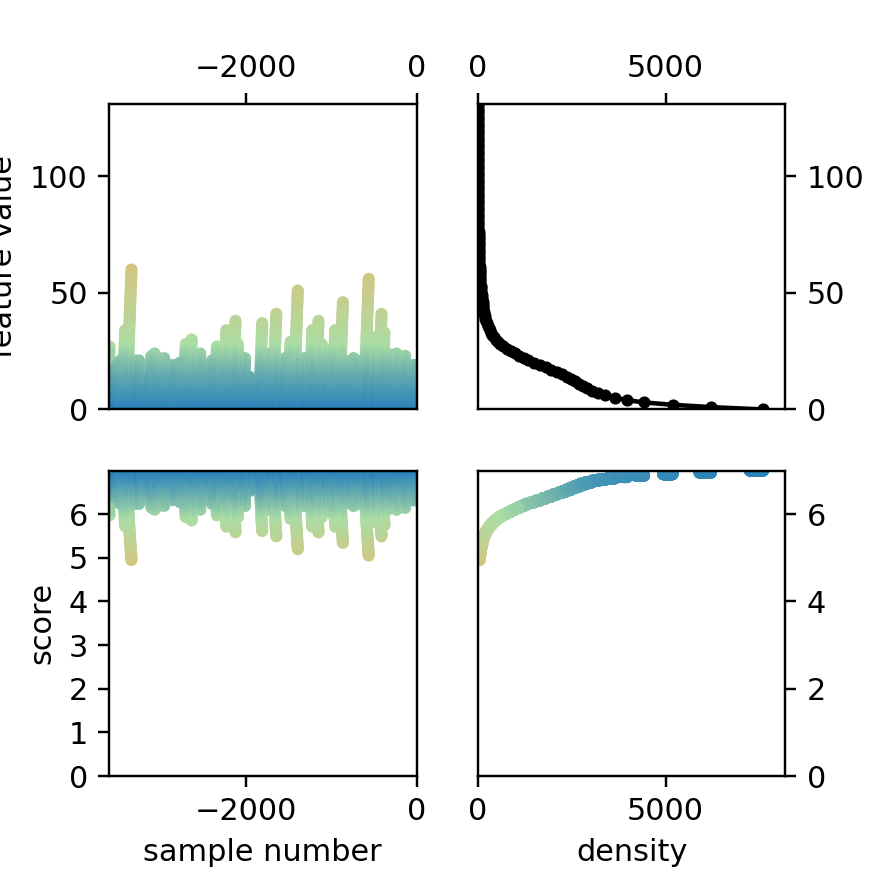

C:\ProgramData\Anaconda3_1\envs\ATK\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [8]:
%matplotlib notebook

import numpy as np

x = np.empty((0,), dtype=[('DateTime', np.datetime64),\
                                        ('CheckDateTime',np.bool_),\
                                        ('CheckT1a',np.bool_),\
                                        ('Number',np.float_),\
                                        ('ScoreT1a',np.float_),\
                                        ('Density',np.float_)])
dfCheck = pandas.DataFrame(x)

NumberOfSamples = len(dfStrData)
#NumberOfSamples =10000
from basic.typical import typicalitydisplay 

typdisp = typicalitydisplay(CheckTYP,memorylength=3600)
typdisp(CheckTYP,density=dfCheck['Density'],value=dfCheck['Number'],score=dfCheck['ScoreT1a'])

for iSample in range(NumberOfSamples):
    if numpy.mod(iSample,300)==0:
        typdisp(CheckTYP,plotupdate=True)
        #print('Sample '+str(iSample)+' of '+str(NumberOfSamples))
        pass
        
    strDateTime = dfStrData['date_time'][iSample]
    strT1a      = dfStrData['T1a'][iSample]
    
    ###########################################################
    ### COPY THE CODE BELOW FOR YOUR REAL-TIME APPLICATION  ###
    ###########################################################
    
    CheckResult0 , DateTime = CheckDT(DateTimeEntry=[strDateTime])
    CheckResult1 , Number   = CheckNUM(NumberEntry=[strT1a])
    ConstantCount = FeatureCONSTANT(Number)
    Score, Density                   = CheckTYP([ConstantCount])
    
    ############################################################
    ### COPY THE CODE BELOW FOR YOUR REAL-TIME VISUALIZATION ###
    ############################################################
    
    typdisp(CheckTYP,value=[ConstantCount],score=Score,density=Density,plotupdate=False)
    